# Importing the Libraries

In [17]:
# Importing all the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [18]:
# Loading the Dataset
pd.options.display.max_rows=999
df=pd.read_csv("Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [19]:
# checking the basic information of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [20]:
# stastical summary of the data frame
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [21]:
# checking the missing Values
df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


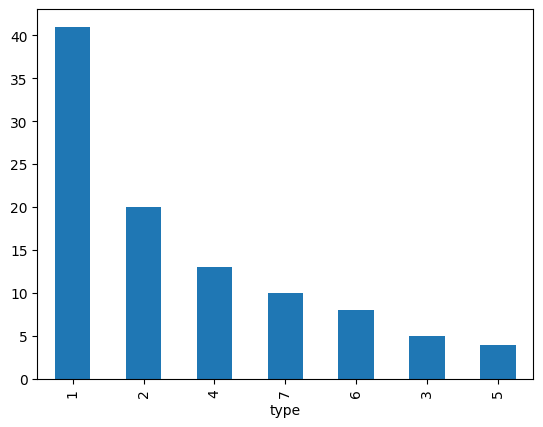

In [22]:
# plotting a bar chart for the type feature
df['type'].value_counts().plot(kind='bar')
plt.show()

#### Here most of the animals are type(1-> mammals),type(2->Birds) and type(4->Fish).

In [23]:
# Dropping the animal name Feature and catsize feature
#because the size varies of same type of animals also
df.drop(["animal name",'catsize'],axis=1,inplace=True)
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,4
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,4
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,1


In [24]:
# splitting the indepedent and depedent variable
x=df.drop("type",axis=1)
y=df['type']

In [40]:
# scaling the features
# scal=scale(x)
# x=pd.DataFrame(scal,columns=x.columns)
# x
# usally without standardization it gives the best accuracy

(101, 15)

In [26]:
# spliting the training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Modeling

In [27]:
# defining the model
KNC=KNeighborsClassifier(n_neighbors=5)
KNC.fit(x_train,y_train)

KNeighborsClassifier()

#### When i choose n_neighbors=5, it gives the best accuracy

In [28]:
# calculating the accuracy
y_pred=KNC.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9047619047619048


In [29]:

n=np.array(range(1,16))
param_grid=dict(n_neighbors=n)

In [30]:
# tunning the hyperparameter using GridSearchCV
warnings.filterwarnings('ignore')
grid=GridSearchCV(estimator=KNC,param_grid=param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])})

In [31]:
# finding the bestscore_ ,best_param,best_estimator
print(grid.best_score_)
grid.best_params_

0.975


{'n_neighbors': np.int64(1)}

In [32]:
# finding the best model
model=grid.best_estimator_
y_pred=model.predict(x_test)

In [33]:
# finding the accuracy
accuracy_score(y_test,y_pred)

0.9523809523809523

In [34]:
# finding the precision_score
import warnings
warnings.filterwarnings('ignore')
precision_score(y_test,y_pred,average=None)

array([1.        , 1.        , 0.        , 0.66666667, 1.        ,
       1.        ])

In [35]:
# calculating the recall_score
recall_score(y_test,y_pred,average=None)

array([1., 1., 0., 1., 1., 1.])

In [36]:
# calculating the f1_score
f1_score(y_test,y_pred,average=None)

array([1. , 1. , 0. , 0.8, 1. , 1. ])

#### Here model predicts the mostly 100 accurate for every class in the target variable.

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)


knn_pca = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

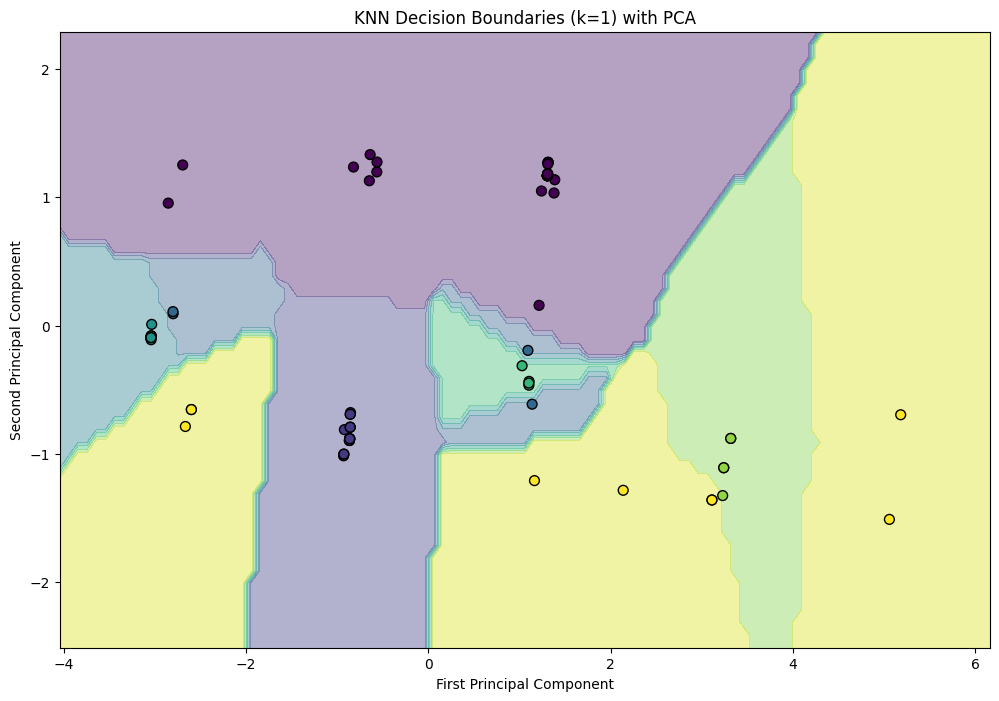

In [45]:
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=50, edgecolor='k', cmap='viridis')
plt.title(f'KNN Decision Boundaries (k={1}) with PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig('knn_decision_boundaries.png')
plt.show()
plt.close()

# Interview Questions

#### The Key hyperparameters are n_neighbours,distance_metric.n_neighbours is used to decide the number of neighbours while predicting the output.distance metrics are used Euclideian distance or Manhattan distance metric.

#### The Distance metrics are Euclideian diistance and Manhattan distance metric.By default KNN uses the Euclideian Metric.